In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet

# A Look at Crude Oil Price/Production and Gasoline Prices Over Time

### all data from: https://www.eia.gov
#### https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=MCRFPUS2&f=M
#### https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=f000000__3&f=m
#### https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m

In [50]:
purchase_price_data = pd.ExcelFile('./data/US_crude_oil_purchase_price.xls')
purchase_price_data_contents = pd.read_excel(purchase_price_data, 'Contents')
crude_oil_purchase_price_data = pd.read_excel(purchase_price_data, 'Data 1', header = 2)

In [3]:
crude_oil_purchase_price_data = crude_oil_purchase_price_data.set_index(['Date'])

In [4]:
crude_oil_purchase_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 579 entries, 1974-01-15 to 2022-03-15
Data columns (total 1 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   U.S. Crude Oil First Purchase Price (Dollars per Barrel)  579 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [19]:
crude_oil_purchase_price_data.head()

,U.S. Crude Oil First Purchase Price (Dollars per Barrel)
Date,
1974-01-15,6.95
1974-02-15,6.87
1974-03-15,6.77
1974-04-15,6.77
1974-05-15,6.87


In [51]:
dollars_per_gallon_data = pd.ExcelFile('./data/US_gas_prices.xls')
dollars_per_gallon_data_contents = pd.read_excel(dollars_per_gallon_data, 'Contents')
gas_dollars_per_gallon_data = pd.read_excel(dollars_per_gallon_data, 'Data 1', header = 2)

In [7]:
gas_dollars_per_gallon_data = gas_dollars_per_gallon_data.set_index(['Date'])

In [8]:
gas_dollars_per_gallon_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351 entries, 1993-04-15 to 2022-06-15
Data columns (total 1 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)  351 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [9]:
gas_dollars_per_gallon_data.head()

,U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
Date,
1993-04-15,1.078
1993-05-15,1.100
1993-06-15,1.097
1993-07-15,1.078
1993-08-15,1.062


In [10]:
crude_oil_production_data = pd.read_csv('./data/U.S._Field_Production_of_Crude_Oil.csv', 
                                        usecols=[0,1])

In [11]:
crude_oil_production_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 2 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Month                                                         1227 non-null   object
 1   Field Production of Crude Oil (Thousands of Barrels per Day)  1227 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.3+ KB


In [12]:
crude_oil_production_data.head()

,Month,Field Production of Crude Oil (Thousands of Barrels per Day)
0,"Mar 2022,11",655
1,"Feb 2022,11",306
2,"Jan 2022,11",369
3,"Dec 2021,11",604
4,"Nov 2021,11",769


### Update column to match datetime format of previous datasets

In [13]:
crude_oil_production_data['Month'] = pd.to_datetime(crude_oil_production_data['Month'])
crude_oil_production_data = crude_oil_production_data.rename(columns ={'Month':'Date'})

In [14]:
crude_oil_production_data = crude_oil_production_data.set_index(['Date'])

In [15]:
crude_oil_production_data.head()

,Field Production of Crude Oil (Thousands of Barrels per Day)
Date,
2022-03-01,655
2022-02-01,306
2022-01-01,369
2021-12-01,604
2021-11-01,769


In [17]:
crude_oil_production_data = crude_oil_production_data.sort_index()

<IPython.core.display.Javascript object>


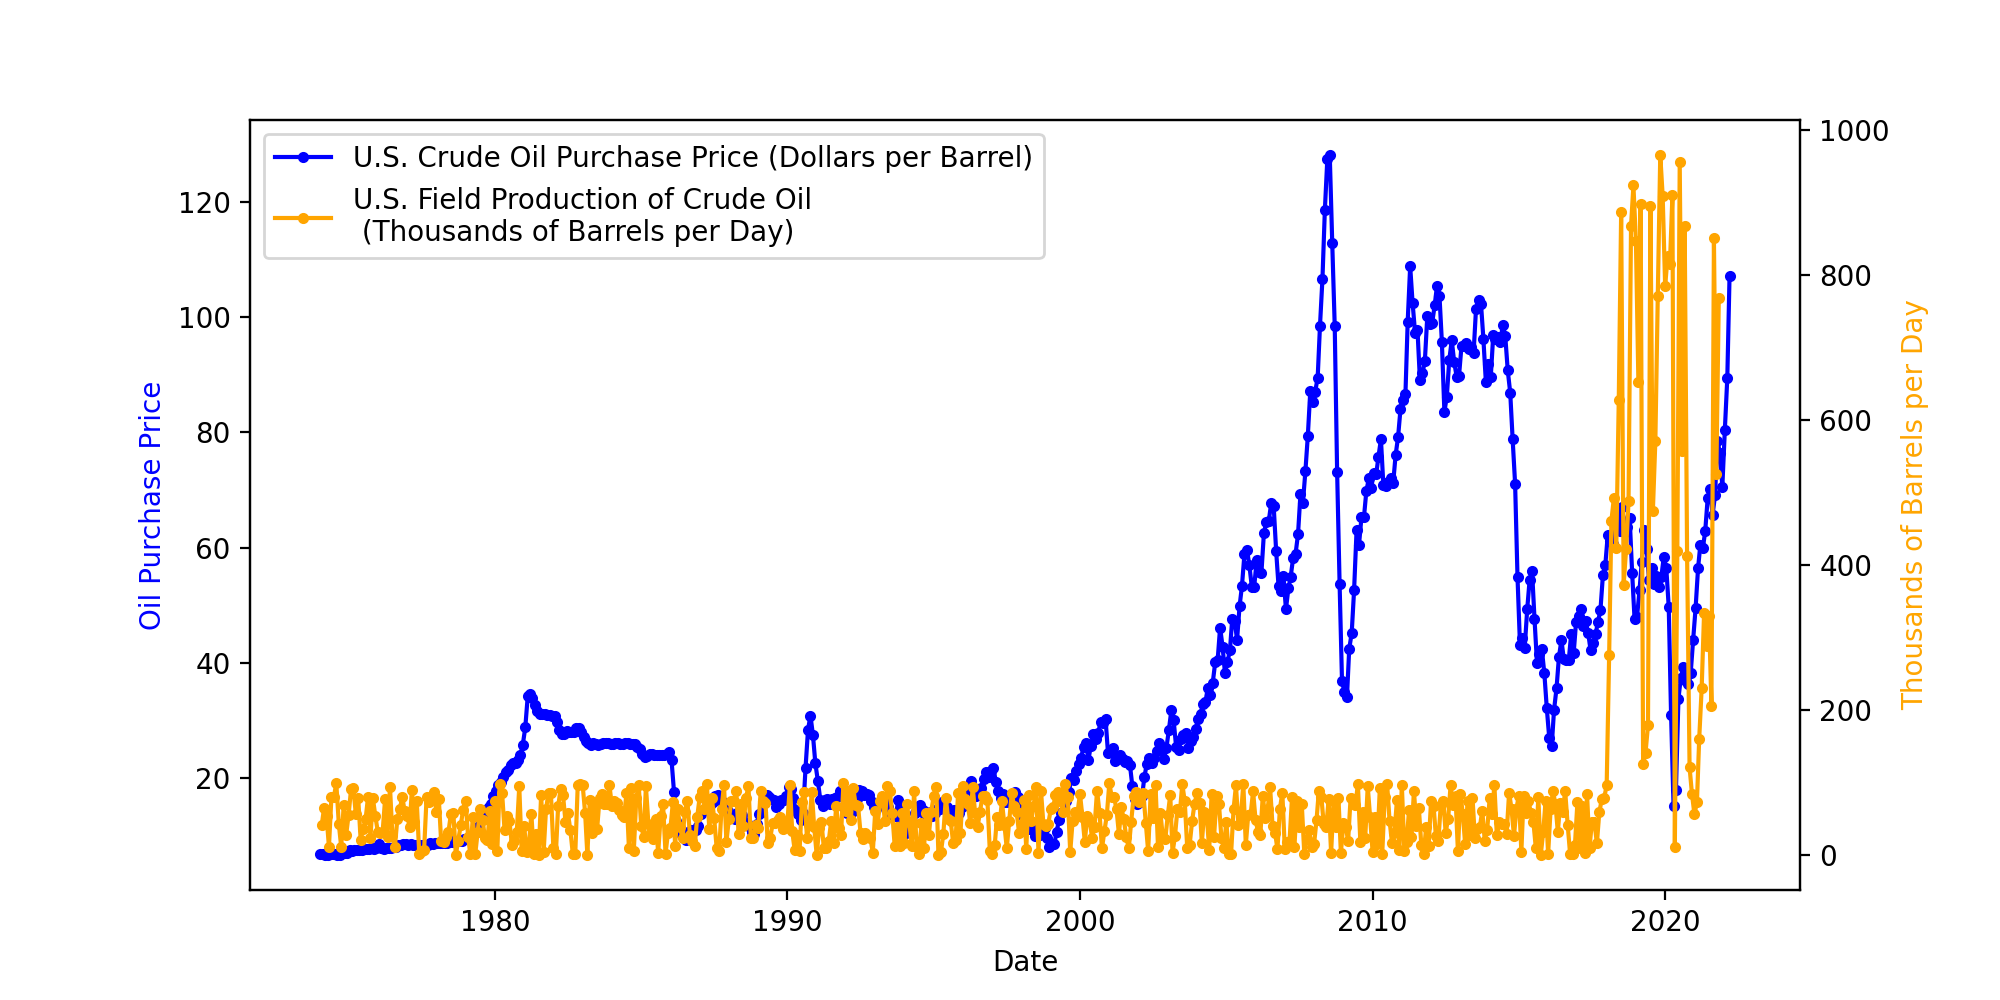

In [47]:
fig,ax = plt.subplots(figsize = (10,5),sharex = True)

lns1 = ax.plot(crude_oil_purchase_price_data['U.S. Crude Oil First Purchase Price (Dollars per Barrel)'], color = 'blue', label = 'U.S. Crude Oil Purchase Price (Dollars per Barrel)',marker = '.')
ax.set_xlabel('Date')
ax.set_ylabel('Oil Purchase Price')
ax.yaxis.label.set_color('blue')

ax2 = ax.twinx()

lns2 = ax2.plot(crude_oil_production_data['Field Production of Crude Oil (Thousands of Barrels per Day)'].loc['1974-01-15':'2021-11-15'], color = 'orange', label = 'U.S. Field Production of Crude Oil \n (Thousands of Barrels per Day)',marker = '.')
ax2.set_ylabel('Thousands of Barrels per Day')
ax2.yaxis.label.set_color('orange')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()

In [36]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

<IPython.core.display.Javascript object>


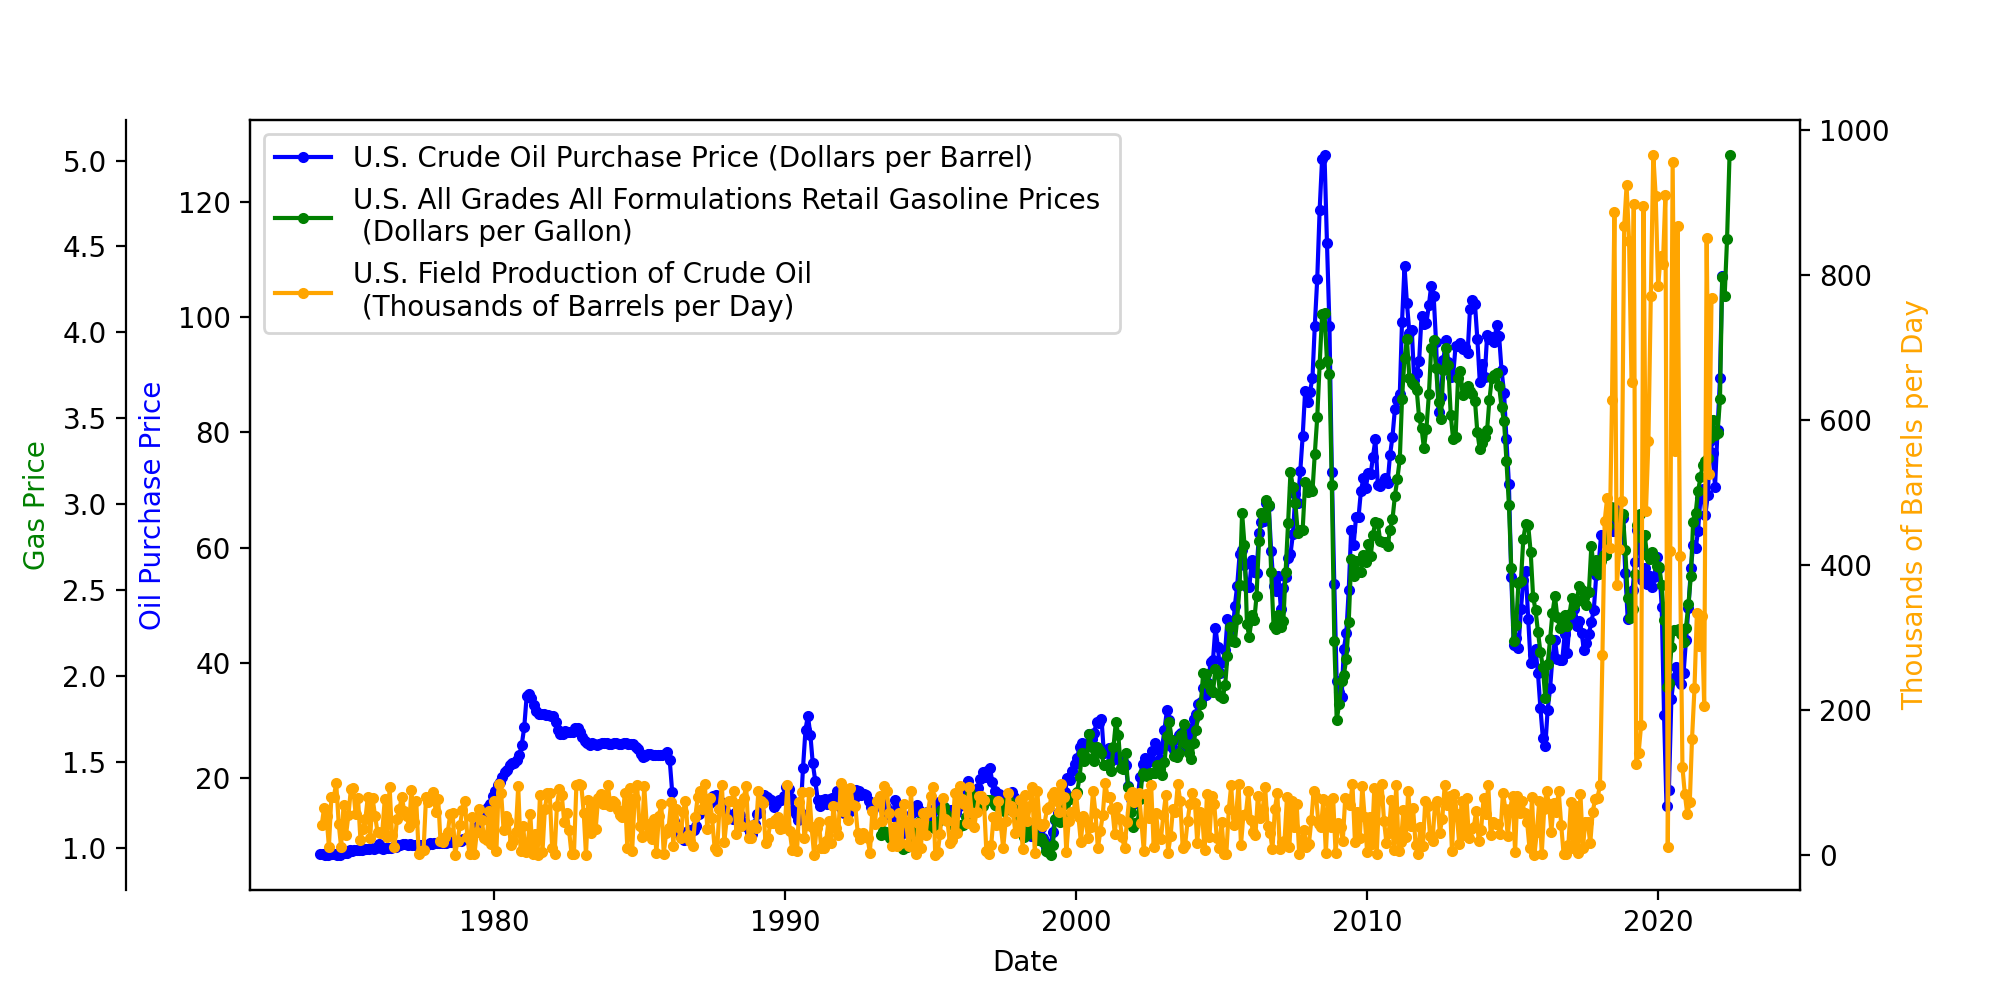

In [49]:
fig,ax = plt.subplots(figsize = (10,5),sharex = True)

lns1 = ax.plot(crude_oil_purchase_price_data['U.S. Crude Oil First Purchase Price (Dollars per Barrel)'], 'blue', label = 'U.S. Crude Oil Purchase Price (Dollars per Barrel)',marker = '.')
ax.set_xlabel('Date')
ax.set_ylabel('Oil Purchase Price')
ax.yaxis.label.set_color('blue')

ax2 = ax.twinx()
lns2 = ax2.plot(gas_dollars_per_gallon_data['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'], color = 'green', label = 'U.S. All Grades All Formulations Retail Gasoline Prices \n (Dollars per Gallon)', marker = '.')
ax2.spines["left"].set_position(("axes",-.08))
make_patch_spines_invisible(ax2)
# Second, show the right spine.
ax2.spines["left"].set_visible(True)
ax2.set_ylabel('Gas Price')
ax2.yaxis.label.set_color('green')
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')


ax3 = ax.twinx()

lns3 = ax3.plot(crude_oil_production_data['Field Production of Crude Oil (Thousands of Barrels per Day)'].loc['1974-01-15':'2021-11-15'], color = 'orange', label = 'U.S. Field Production of Crude Oil \n (Thousands of Barrels per Day)',marker = '.')
ax3.set_ylabel('Thousands of Barrels per Day')
ax3.yaxis.label.set_color('orange')

# added these three lines
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

plt.show()